In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import re, string
import random 

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords, words
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk import pos_tag 
from PIL import Image 
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hridayashinde/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hridayashinde/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv("ios14tweets.csv")
df = pd.DataFrame(df['Text'])
df

,Text
0,How to Install iOS 14 Beta https://t.co/VCGTJI...
1,How to Install iOS 14 Beta https://t.co/VCGTJI...
2,I wanna get the beta for iOS 14 but my insuran...
3,I’m able to download iOS 14 beta.. should I do...
4,Τεχνολογία: Regret installing the iOS 14 or iP...
...,...
996,Beta pubblica di iOS 14 🥰
997,Should I update to iOS 14 public beta or nah?
998,@NianticHelp there is a glitch with PokémonGo ...
999,打电话切换音频输出的选项界面是这次 iOS 14 beta 2 才改的吗？前几天我记得还是之...


#Remove non-english tweets
words = set(nltk.corpus.words.words())
for i in df['Text']:
    for w in df['Text']:
        df['non-eng'] = " ".join(w for w in nltk.wordpunct_tokenize(w) if w.lower() in words or not w.isalpha())

In [4]:
#Cleaning the tweets
#df['eng'] = df['Text'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(w) if w.lower() in words or not w.isalpha()))
#converting to lowercase
df['clean_text'] = df['Text'].str.lower()

#removing links,urls
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x, flags=re.MULTILINE))
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x, flags=re.MULTILINE))

#removing html reference characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'&[a-z]+;', '', x))

# Remove user @ references and '#' from tweet
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\@\w+|\#|\d+', '', x))

#removing characters that aren't letters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#@]", '', x))

# Remove all the special characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\W',' ', x))

# remove all single characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x))

#removing twitter handles
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'@mention', '', x))


df

,Text,clean_text
0,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta
1,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta
2,I wanna get the beta for iOS 14 but my insuran...,i wanna get the beta for ios but my insurance...
3,I’m able to download iOS 14 beta.. should I do...,im able to download ios beta should do it
4,Τεχνολογία: Regret installing the iOS 14 or iP...,regret installing the ios or ipados public...
...,...,...
996,Beta pubblica di iOS 14 🥰,beta pubblica di ios
997,Should I update to iOS 14 public beta or nah?,should update to ios public beta or nah
998,@NianticHelp there is a glitch with PokémonGo ...,there is glitch with pokmongo on ios beta it...
999,打电话切换音频输出的选项界面是这次 iOS 14 beta 2 才改的吗？前几天我记得还是之...,ios beta


In [5]:
# apply sentiment analysis
analyser = SentimentIntensityAnalyzer()

sentiment_score_list = []
sentiment_label_list = []

for i in df['clean_text'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= -0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')
    
df['sentiment'] = sentiment_label_list
df['sentiment score'] = sentiment_score_list
df0 = df.copy()
#df = df[df['sentiment score'] != 0]
#df = df.reset_index(drop=True)
df

,Text,clean_text,sentiment,sentiment score
0,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta,Neutral,0.0000
1,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta,Neutral,0.0000
2,I wanna get the beta for iOS 14 but my insuran...,i wanna get the beta for ios but my insurance...,Neutral,0.0000
3,I’m able to download iOS 14 beta.. should I do...,im able to download ios beta should do it,Neutral,0.0000
4,Τεχνολογία: Regret installing the iOS 14 or iP...,regret installing the ios or ipados public...,Negative,-0.4215
...,...,...,...,...
996,Beta pubblica di iOS 14 🥰,beta pubblica di ios,Neutral,0.0000
997,Should I update to iOS 14 public beta or nah?,should update to ios public beta or nah,Negative,-0.1027
998,@NianticHelp there is a glitch with PokémonGo ...,there is glitch with pokmongo on ios beta it...,Negative,-0.1695
999,打电话切换音频输出的选项界面是这次 iOS 14 beta 2 才改的吗？前几天我记得还是之...,ios beta,Neutral,0.0000


In [6]:
# tokenise string

df['tokenise'] = df.apply(lambda row: nltk.word_tokenize(row[1]), axis=1)
df

,Text,clean_text,sentiment,sentiment score,tokenise
0,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta,Neutral,0.0000,"[how, to, install, ios, beta]"
1,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta,Neutral,0.0000,"[how, to, install, ios, beta]"
2,I wanna get the beta for iOS 14 but my insuran...,i wanna get the beta for ios but my insurance...,Neutral,0.0000,"[i, wan, na, get, the, beta, for, ios, but, my..."
3,I’m able to download iOS 14 beta.. should I do...,im able to download ios beta should do it,Neutral,0.0000,"[im, able, to, download, ios, beta, should, do..."
4,Τεχνολογία: Regret installing the iOS 14 or iP...,regret installing the ios or ipados public...,Negative,-0.4215,"[regret, installing, the, ios, or, ipados, pub..."
...,...,...,...,...,...
996,Beta pubblica di iOS 14 🥰,beta pubblica di ios,Neutral,0.0000,"[beta, pubblica, di, ios]"
997,Should I update to iOS 14 public beta or nah?,should update to ios public beta or nah,Negative,-0.1027,"[should, update, to, ios, public, beta, or, nah]"
998,@NianticHelp there is a glitch with PokémonGo ...,there is glitch with pokmongo on ios beta it...,Negative,-0.1695,"[there, is, glitch, with, pokmongo, on, ios, b..."
999,打电话切换音频输出的选项界面是这次 iOS 14 beta 2 才改的吗？前几天我记得还是之...,ios beta,Neutral,0.0000,"[ios, beta]"


In [7]:
# initiate nltk lemmatiser

wordnet_lemmatizer = WordNetLemmatizer()

# lemmatise words

df['lemmatise'] = df['tokenise'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x]) 
df

,Text,clean_text,sentiment,sentiment score,tokenise,lemmatise
0,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta,Neutral,0.0000,"[how, to, install, ios, beta]","[how, to, install, io, beta]"
1,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta,Neutral,0.0000,"[how, to, install, ios, beta]","[how, to, install, io, beta]"
2,I wanna get the beta for iOS 14 but my insuran...,i wanna get the beta for ios but my insurance...,Neutral,0.0000,"[i, wan, na, get, the, beta, for, ios, but, my...","[i, wan, na, get, the, beta, for, io, but, my,..."
3,I’m able to download iOS 14 beta.. should I do...,im able to download ios beta should do it,Neutral,0.0000,"[im, able, to, download, ios, beta, should, do...","[im, able, to, download, io, beta, should, do,..."
4,Τεχνολογία: Regret installing the iOS 14 or iP...,regret installing the ios or ipados public...,Negative,-0.4215,"[regret, installing, the, ios, or, ipados, pub...","[regret, installing, the, io, or, ipados, publ..."
...,...,...,...,...,...,...
996,Beta pubblica di iOS 14 🥰,beta pubblica di ios,Neutral,0.0000,"[beta, pubblica, di, ios]","[beta, pubblica, di, io]"
997,Should I update to iOS 14 public beta or nah?,should update to ios public beta or nah,Negative,-0.1027,"[should, update, to, ios, public, beta, or, nah]","[should, update, to, io, public, beta, or, nah]"
998,@NianticHelp there is a glitch with PokémonGo ...,there is glitch with pokmongo on ios beta it...,Negative,-0.1695,"[there, is, glitch, with, pokmongo, on, ios, b...","[there, is, glitch, with, pokmongo, on, io, be..."
999,打电话切换音频输出的选项界面是这次 iOS 14 beta 2 才改的吗？前几天我记得还是之...,ios beta,Neutral,0.0000,"[ios, beta]","[io, beta]"


In [8]:
# initiate stopwords from nltk
stop_words = stopwords.words('english')

# add additional missing terms
user_stop_words = ['ios', 'apps','public','t','io', 'co', 'instalar', 'private', 'ios14','iOS','IOS','beta','@','US','Week','14']

alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets

# remove stopwords
df['remove_stopwords'] = df['lemmatise'].apply(lambda x: [item for item in x if item not in stop_words])

df

,Text,clean_text,sentiment,sentiment score,tokenise,lemmatise,remove_stopwords
0,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta,Neutral,0.0000,"[how, to, install, ios, beta]","[how, to, install, io, beta]",[install]
1,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta,Neutral,0.0000,"[how, to, install, ios, beta]","[how, to, install, io, beta]",[install]
2,I wanna get the beta for iOS 14 but my insuran...,i wanna get the beta for ios but my insurance...,Neutral,0.0000,"[i, wan, na, get, the, beta, for, ios, but, my...","[i, wan, na, get, the, beta, for, io, but, my,...","[wan, na, get, insurance, wont, cover, new, ph..."
3,I’m able to download iOS 14 beta.. should I do...,im able to download ios beta should do it,Neutral,0.0000,"[im, able, to, download, ios, beta, should, do...","[im, able, to, download, io, beta, should, do,...","[im, able, download]"
4,Τεχνολογία: Regret installing the iOS 14 or iP...,regret installing the ios or ipados public...,Negative,-0.4215,"[regret, installing, the, ios, or, ipados, pub...","[regret, installing, the, io, or, ipados, publ...","[regret, installing, ipados, go, back, cnet]"
...,...,...,...,...,...,...,...
996,Beta pubblica di iOS 14 🥰,beta pubblica di ios,Neutral,0.0000,"[beta, pubblica, di, ios]","[beta, pubblica, di, io]","[pubblica, di]"
997,Should I update to iOS 14 public beta or nah?,should update to ios public beta or nah,Negative,-0.1027,"[should, update, to, ios, public, beta, or, nah]","[should, update, to, io, public, beta, or, nah]","[update, nah]"
998,@NianticHelp there is a glitch with PokémonGo ...,there is glitch with pokmongo on ios beta it...,Negative,-0.1695,"[there, is, glitch, with, pokmongo, on, ios, b...","[there, is, glitch, with, pokmongo, on, io, be...","[glitch, pokmongo, allow, open, app]"
999,打电话切换音频输出的选项界面是这次 iOS 14 beta 2 才改的吗？前几天我记得还是之...,ios beta,Neutral,0.0000,"[ios, beta]","[io, beta]",[]


In [9]:
# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = [word for (word, tag) in pos_tag(tweet) if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [10]:
# Apply getAdjectives function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Adjectives'
df['Tweets_Adjectives'] = df['tokenise'].apply(getAdjectives)

In [11]:
df

,Text,clean_text,sentiment,sentiment score,tokenise,lemmatise,remove_stopwords,Tweets_Adjectives
0,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta,Neutral,0.0000,"[how, to, install, ios, beta]","[how, to, install, io, beta]",[install],
1,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta,Neutral,0.0000,"[how, to, install, ios, beta]","[how, to, install, io, beta]",[install],
2,I wanna get the beta for iOS 14 but my insuran...,i wanna get the beta for ios but my insurance...,Neutral,0.0000,"[i, wan, na, get, the, beta, for, ios, but, my...","[i, wan, na, get, the, beta, for, io, but, my,...","[wan, na, get, insurance, wont, cover, new, ph...",new
3,I’m able to download iOS 14 beta.. should I do...,im able to download ios beta should do it,Neutral,0.0000,"[im, able, to, download, ios, beta, should, do...","[im, able, to, download, io, beta, should, do,...","[im, able, download]",able
4,Τεχνολογία: Regret installing the iOS 14 or iP...,regret installing the ios or ipados public...,Negative,-0.4215,"[regret, installing, the, ios, or, ipados, pub...","[regret, installing, the, io, or, ipados, publ...","[regret, installing, ipados, go, back, cnet]",ipados public
...,...,...,...,...,...,...,...,...
996,Beta pubblica di iOS 14 🥰,beta pubblica di ios,Neutral,0.0000,"[beta, pubblica, di, ios]","[beta, pubblica, di, io]","[pubblica, di]",
997,Should I update to iOS 14 public beta or nah?,should update to ios public beta or nah,Negative,-0.1027,"[should, update, to, ios, public, beta, or, nah]","[should, update, to, io, public, beta, or, nah]","[update, nah]",public
998,@NianticHelp there is a glitch with PokémonGo ...,there is glitch with pokmongo on ios beta it...,Negative,-0.1695,"[there, is, glitch, with, pokmongo, on, ios, b...","[there, is, glitch, with, pokmongo, on, io, be...","[glitch, pokmongo, allow, open, app]",
999,打电话切换音频输出的选项界面是这次 iOS 14 beta 2 才改的吗？前几天我记得还是之...,ios beta,Neutral,0.0000,"[ios, beta]","[io, beta]",[],


In [12]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_list = df['Tweets_Adjectives'].tolist()
list_no_dup = []
[list_no_dup.append(x) for x in tweets_long_list if x not in list_no_dup]
tweets_long_string = " ".join(list_no_dup)

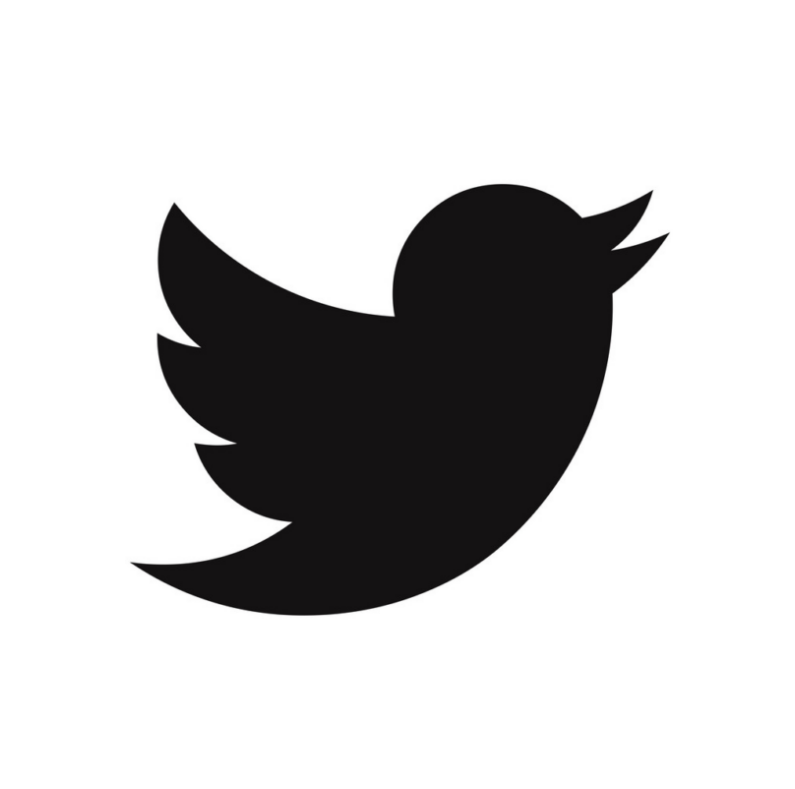

In [13]:
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image


In [14]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

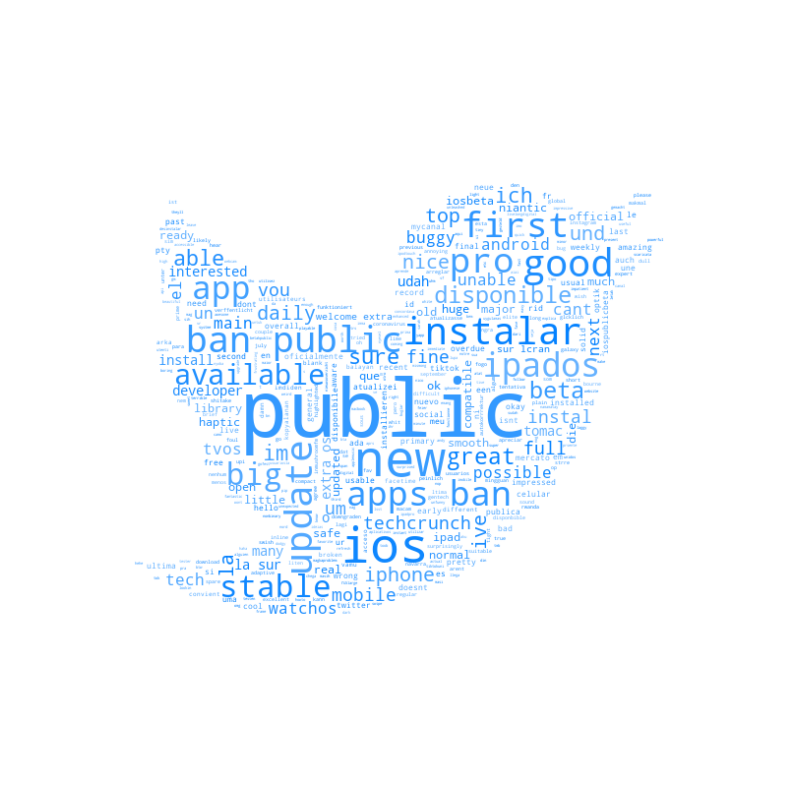

In [15]:
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()


In [16]:
# Combine all words into a list
tweets_long_string = df['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [17]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
df1 = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df1.columns = ['Words', 'Count']
df1.sort_values(by='Count', ascending=False, inplace=True)


In [18]:
df1.head(10)

,Words,Count
3,public,500
31,ban,174
15,apps,172
25,pro,61
0,new,49
4,ios,48
109,top,46
44,instalar,32
104,first,31
2,ipados,30


In [19]:
# See quick results of the Sentiment Analysis
df0['sentiment'].value_counts()

Neutral     464
Negative    279
Positive    258
Name: sentiment, dtype: int64

In [20]:
# Create dataframe for Count of Sentiment Categories
bar_chart = df0['sentiment'].value_counts().rename_axis('sentiment').to_frame('Total Tweets').reset_index()


In [21]:
bar_chart # Display dataframe

,sentiment,Total Tweets
0,Neutral,464
1,Negative,279
2,Positive,258


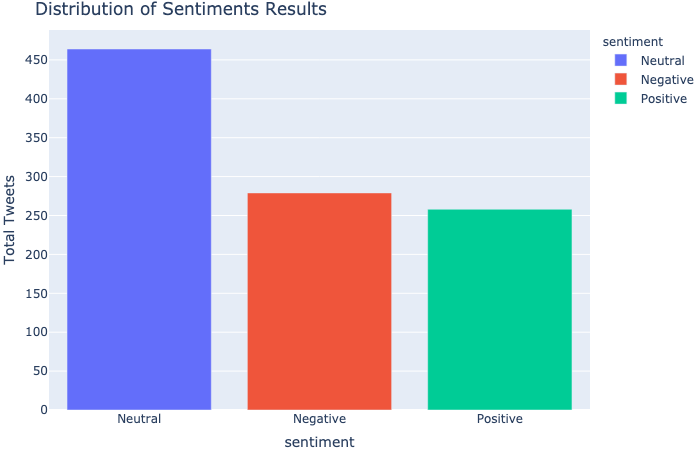

In [22]:
sentiments_barchart = px.bar(bar_chart, x = 'sentiment', y='Total Tweets', color='sentiment')

sentiments_barchart.update_layout(title='Distribution of Sentiments Results',
                                  margin={"r": 0, "t": 30, "l": 0, "b": 0})

sentiments_barchart.show(renderer = 'png') #Display plot. 
